In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load dataset
data = pd.read_csv('Q1.csv', index_col=0)
data.shape

(250, 31)

In [11]:
data_x = data.iloc[:,0:30]
data_y = data['Y']

In [18]:
from sklearn.linear_model import LogisticRegression
np.random.seed(20)
B = 500
C = 1000
n = 250
coefs = []
D_is = []
first_term = []
classifier = LogisticRegression(solver='liblinear', C=C, penalty='l1')
classifier.fit(data_x, data_y)
classifier.coef_[0]

for i in range(30):
    first_term.append(n * classifier.coef_[0][i])
    
for i in range(n):
    x_boot = data_x.drop(i)
    y_boot = data_y.drop(i)
    classifier = LogisticRegression(solver='liblinear', C=C, penalty='l1')
    classifier.fit(x_boot, y_boot)
    coefs.append(classifier.coef_[0])

In [19]:
coefs = np.array(coefs)
print(len(coefs))
print(len(coefs[0]))

250
30


In [57]:
gamas = []
means = []
stds = []
S_square = []
for i in range(n):
    one_gama = []
    for l in range(30):
        one_gama.append(first_term[l] - (n-1)*coefs[i][l])
    gamas.append(one_gama)

for l in range(30):
    means.append(np.mean(gama_ma[l]))
    stds.append(np.std(gama_ma[l], ddof=0)**2)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


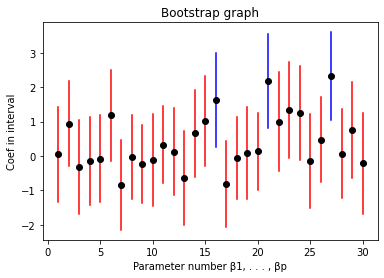

In [59]:
list_with_zero = []
for i in range(30):
    some_coef = np.sort(coefs[:,i])
    some_coef = some_coef[25:475]
    lower = means[i] - 1.645 * np.sqrt(stds[i] / n)
    higher = means[i] + 1.645 * np.sqrt(stds[i] / n)

    if (0 >= lower and 0 <= higher):
        color = 'r'
        list_with_zero.append(0)
    else:
        color = 'b'
        list_with_zero.append(1)
    
    plt.plot([i + 1,i + 1], [lower, higher], color=color)
    plt.plot(i + 1, means[i], 'o', color='black')

print(list_with_zero)
    
plt.xlabel("Parameter number β1, . . . , βp")
plt.ylabel("Coef in interval")
plt.title('Bootstrap graph')
plt.show()